# Исследование для интернет-магазина игр «Стримчик»

Интернет-магазином компьютерных игр «Стримчик» были передоставлен датасет с историческими данными о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Требуется провести их исследование и выявить определяющие успешность игр закономерности, что позволит сделать ставку на потенциально популярный продукты и спланировать рекламные кампании на следующий год.

Данные собирались из различных открытых источников. К тому же отмечается, что данные за 2016 год могут быть не полными.

**Цели исследования**

- выявить наиболее перспективные игровые платформы и жанры.
- выяснить, как вляют оценки критиков и игроков на продажи.
- составить портрет игроков, в зависимости от региона.
- проверить две гипотезы о равенстве оценок игроков различных платформ и жанров.

**Ход исследования**

Данные представлены датасете games.csv. О качестве данных ничего не известно, поэтому перед основным исследованием потребуется обзор данных. Надо проверить даные на ошибки и пропуски. Если они есть, надо найти возможность исправить некорректные данные.

Таким образом, исследоваание будет состоять из восьми этапов:

- Загрузка данных
- Подготовка данных
- Исследовательский анализ данных
- Исследование портрета игроков
- Проверка гипотез
- Общий вывод

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделано описание проекта. 👍</font>

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st

## Загрузка данных

In [2]:
try: 
    games = pd.read_csv('d:/practicum/5sprint/games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


***Промежуточный итог***  
Загрузили данные. Датасет содержит 16715 строк данных. Название всех колонок содержать заглавные буквы - надо исправить на строчные. Типы данных в колонке Year_of_Release, User_Score - некорректны. Есть единичные пропуски в колонках Name, Genre и большое количество пропусков в колонках Year_of_Release, Critic_Score, User_Score, Rating.

## Подготовка данных

### Названия колонок

Приводим названия колонок к нижнему регистру

In [5]:
games.columns = map(str.lower, games.columns)
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Дубликаты

Оценим явные дубликаты. Явных дубликатов нет

In [6]:
games.duplicated().sum()

0

Проверим на неявные дубликаты, оценивая сколько в датесете есть годов с одновременно совпадающими названием и платформой. Если больше 1 - возможно, неявные дубликаты.

In [7]:
games.groupby(['name', 'platform'])['year_of_release'].count().sort_values(ascending=False).head(20)

name                                                   platform
Need for Speed: Most Wanted                            X360        2
                                                       PC          2
Madden NFL 13                                          PS3         2
Rainbow Islands: Revolution                            PSP         1
RalliSport Challenge 2                                 XB          1
RalliSport Challenge                                   XB          1
Rakushou! Pachi-Slot Sengen 6: Rio 2 Cruising Vanadis  PS2         1
Rakushou! Pachi-Slot Sengen 5: Rio Paradise            PS2         1
Rakushou! Pachi-Slot Sengen 4                          PS2         1
Rain (2013)                                            PS3         1
Rainbow Islands Revolution                             DS          1
Rally Challenge 2000                                   N64         1
Railroad Tycoon II                                     PS          1
Railroad Tycoon 3                      

Две игры имеют подозрение на неявные дубликаты - "Need for Speed: Most Wanted" и "Madden NFL 13". Проверим строки в датесете с этими играми,

In [8]:
games.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Need for Speed: Most Wanted вышло в 2005 на платформах PC и X360, а в 2012 годах повторилась такая ситуация - это не дубликаты.

In [9]:
games.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


В датасете есть сразу две записи Madden NFL 13 релиза 2012 года на платфоме PS3. При этом у них разные оценки. Это неявный дубликат. Один их них надо удалить, лучше тот, где меньше данных в колонках - то есть строчку с индексом 16230 

In [10]:
games = games.drop(16230)

### Пропуски в колонке name

Пропуски в колонке названий могут быть вызваны техническим сбоем при формировании датасета. Например, попался некорректный символ. К счастью, таких пропусков всего два

In [11]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две не особо полезные строчки - можно просто удалить их

In [12]:
games = games.dropna(subset=['name'])

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски в названии игр, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

### Пропуски в колонке year_of_release

Учитывая, что исходный датасет формировался на основе открытых источников, пропуски в колонке year_of_release могут быть обусловлены сбоем скрипта, который импортировал в базу данные из дрругих источников. Также возможно этих данных просто не было в одном из открытых источников, на основании которых формировался даатсет.

In [13]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
games[games['year_of_release'].isna()]['name'].count() / len(games)

0.016096218286261368

Всего 269 строк с пропусками. Как либо восстановить значения пропусков year_of_release не представляется возможным. Так как пропусков мало - 1,6% от всего дасета - можно просто их удалить.

In [15]:
games = games.dropna(subset=['year_of_release'])

Теперь, когда в колонке year_of_release нет пропусков, можно привести колонку year_of_release к типу int

In [16]:
games['year_of_release'] = games['year_of_release'].astype('int')

### Пропуски в колонке user_score и critic_score

Пропуски в колонках user_score и critic_score также могут появится по разным причинам 

- малораспространненая игра и у нее еще нет оценок
- игра старая, и когда она была широко распространена базы с оценками еще не было
- сбой при экспорте из открытого источника (например, "." / "," в качесвте разделителя целой / дробной части)
- сбой при вычислении средней оценки (например, деление на ноль)


In [17]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В колонке user_score данные в формате "строка". Кроме действительных чисел и пропусков Nan, также есть значение "tbd", что рассшифровывается как "Подлежит определению", то есть это "не определено", тоже самое что "Nan". Причем таких строк довольно много

In [18]:
games[games['user_score'] == 'tbd']['user_score'].count()

2376

In [19]:
games[games['user_score'] == 'tbd'].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


 Никаких закономерностей в строках c "tbd" не видно. Предлагаю просто заменить tbd на None

In [20]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = None

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd". Это практически аналог пропусков.</font>

In [21]:
games[games['user_score'].isna()]['name'].count() / len(games)

0.5461898680289485

В колонке user_score 54% пропусков. Удалять столько значимое количество строк с пропусками не стоит. Как-либо восстановить пропуски в колонке user_score не представляется возможным. Не имеет смысла и заменять пропуски на какую-либо "заглушку", так как значения в ней - действительные числа, при операциях с которыми пропуски типа Nan просто будут проигнорированны. Просто приведем колонку user_score к типу float

In [22]:
games['user_score'] = games['user_score'].astype('float')

Рассмотрим колонку critic_score

In [23]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [24]:
games[games['critic_score'].isna()]['name'].count() / len(games)

0.5145654685884571

В колонке critic_score данные в формате float. Только действительные числа и пропуски типа Nan. Пропуски в 51% строчек. Удалять столь значимое количество строк с пропусками не стоит. Как либо восстановить пропуски в колонке critic_score не представляется возможным. Не имеет смысла и заменять пропуски на какую-либо "заглушку", так как значения в ней - действительные числа, при операциях с которыми пропуски типа Nan просто будут проигнорированны.

### Пропуски в колонке rating

In [25]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [26]:
games[games['rating'].isna()]['name'].count() / len(games)

0.40600863589369335

В колонке rating данные в формате "строка". Значения колонки представлят перечисляемый тип и пропуски типа Nan. Возрастной рейтинг игр ESRB основан на их содержании аналогично рейтинговым системам кино, применяется для игр, официально продающихся в Севетной Америке. Пропуски в 40% строчек. Удалять столь значимое количество строк с пропусками не стоит. Как либо восстановить пропуски в колонке rating не представляется возможным. Однако отсуствие рейтинга может означать, что игра официально не продавалась в Северной Америке. Имеет смысл заменить пропуски на какую-либо "заглушку", так как значения в ней - перечисляемый тип и "заглушка" позволит проводить операции и с такими строчками. Поставим загрушку "not_def" - не определен.

In [27]:
games['rating'] = games['rating'].fillna('not_def')

### Cуммарные продажи

Запишем суммарные продажи по каждой игре в отдельный столбец. Кстати, непонятно, в чем продажи измеряются - деньгах, штуках. Порядок числе в датасете - тысячи / миллионы. Впрочем, для нашего анализа это не принципиально.

In [28]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Проверим еще раз датасет на дубликаты

In [29]:
games.duplicated().sum()

0

Завершаем подговку датасета для анализа сбрасываем индексов

In [30]:
games.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,not_def,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,not_def,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,not_def,0.01
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,not_def,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,not_def,0.01
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,not_def,0.01


In [31]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


### Промежуточный итог  
В этой части мы исправили исправили название колонок на удобные. Восстановили некоторые пропруски в колонке year_of_release, остальные заменили на особое "почетное" значение. Привели пропуски в колонке user_score к однообразному виду. Исправили типы данных к колонках  year_of_release и user_score. Добавиил колонку total_sales с суммарными продажами.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что сделаны выводы по разделу предобработки данных. 👍</font>

In [32]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name :

## Исследовательский анализ

### Релизы игр по годам

Построим графк распределения релизов игр по годам

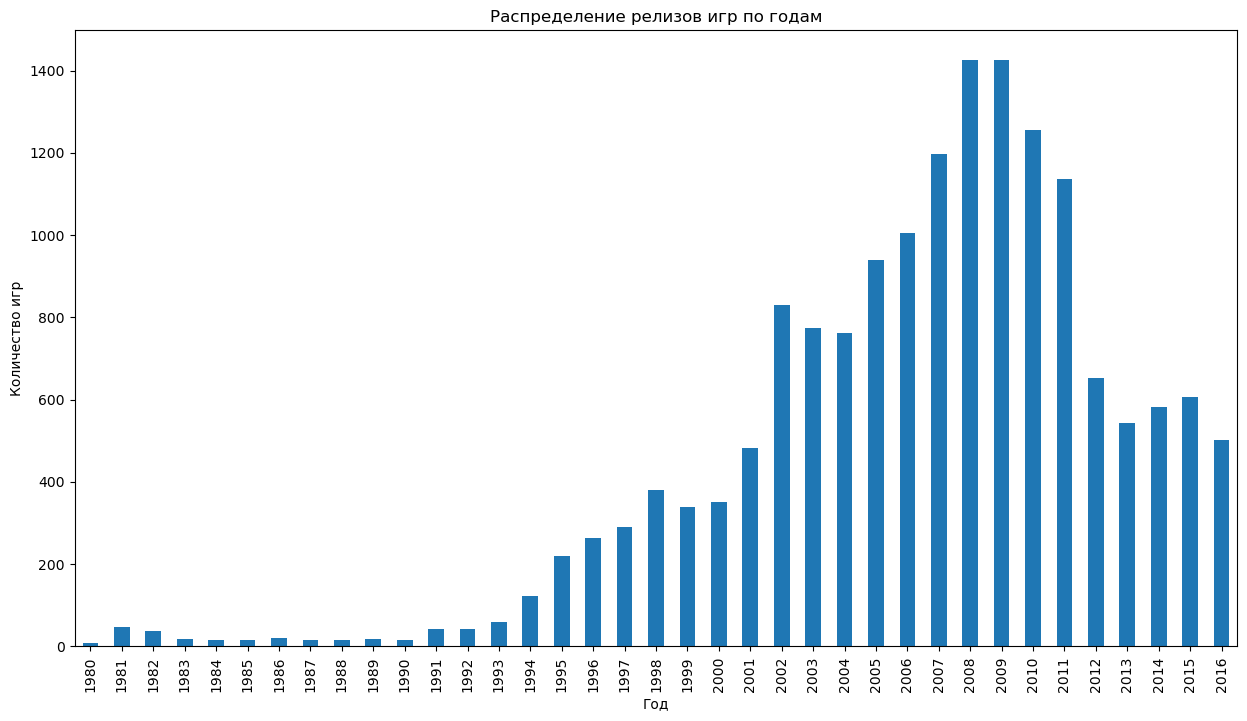

In [33]:
games.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(15, 8));
plt.title('Распределение релизов игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.show()

Из графика видно, что рост игровой индустрии начался в середине 1990-х, до 1990 года выпускалось совсем мало игр. То есть статистику игр до 1990 года можно не рассматривать. Расцвет игроовой индустрии пришелся на 2008-2009 годы - выпускалось почти по 1500 игр в год. К 2012 году произошел резкий спад. В середине 2010-х выпускалось примерно по 500 игр в год.

### Распределение игр по платформам

Построим графк распределения релизов игр по платформам

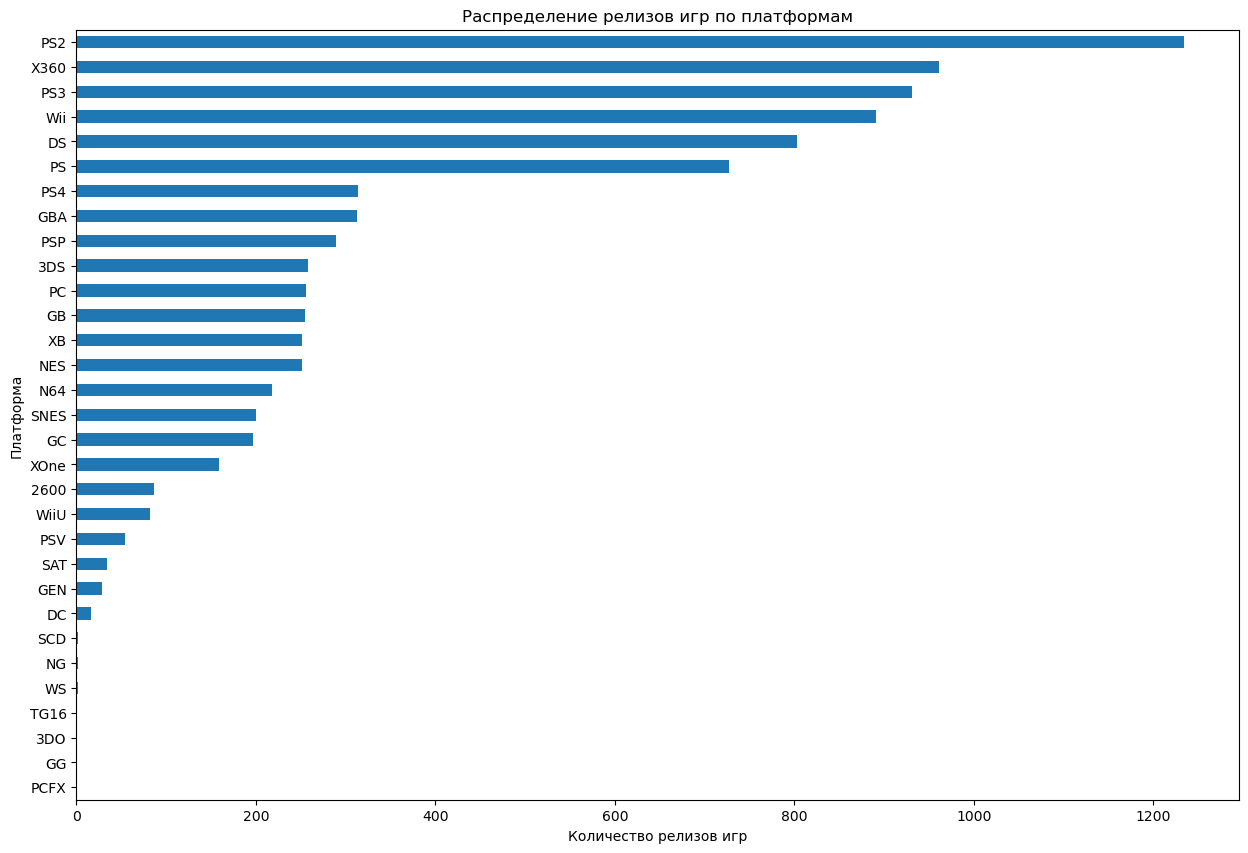

In [34]:
games.groupby('platform')['total_sales'].sum().sort_values().plot(kind='barh', figsize=(15, 10));
plt.title('Распределение релизов игр по платформам')
plt.xlabel('Количество релизов игр')
plt.ylabel('Платформа')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

К декабрю 2016 года больше всего игр было выпушено для PlayStation 1, 2 и 3 поколения, а также X360, Wii и DS. Остальные платформы сильно проигрывают по количеству выпушенных игр.

Построим для популярных платформ графики выхода релизов по годам

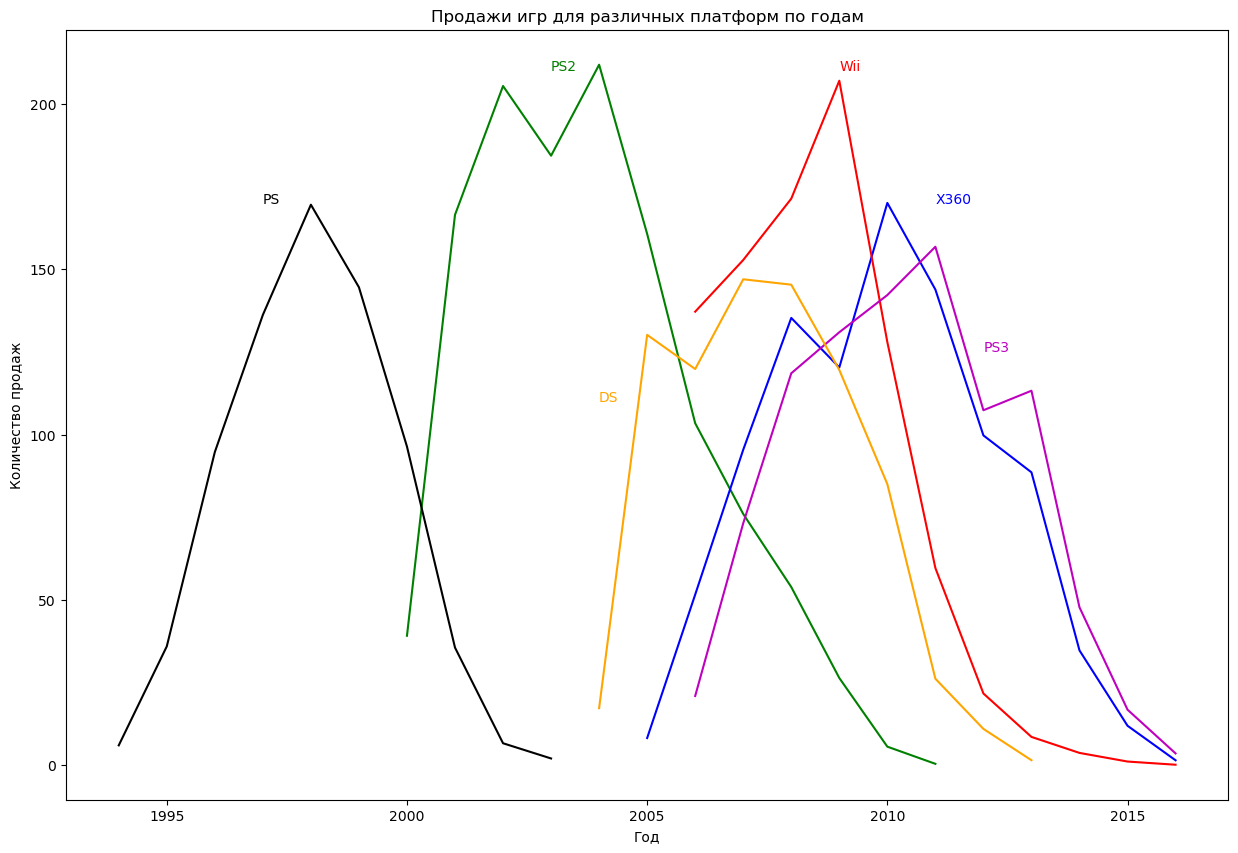

In [35]:
games.query('platform == "PS2" & year_of_release > 1990').groupby('year_of_release')['total_sales'].sum().\
    plot(kind='line', color='green', figsize=(15,10));
plt.text(2003, 210,'PS2', color='green')

games.query('platform == "X360" & year_of_release > 1990').groupby('year_of_release')['total_sales'].sum().\
    plot(kind='line', color='blue');
plt.text(2011, 170,'X360', color='blue')

games.query('platform == "Wii" & year_of_release > 1990').groupby('year_of_release')['total_sales'].sum().\
    plot(kind='line', color='red');
plt.text(2009, 210,'Wii', color='red')

games.query('platform == "PS3" & year_of_release > 1990').groupby('year_of_release')['total_sales'].sum().\
    plot(kind='line', color='m');
plt.text(2012, 125,'PS3', color='m')

games.query('platform == "DS" & year_of_release > 1990').groupby('year_of_release')['total_sales'].sum().\
    plot(kind='line', color='orange');
plt.text(2004, 110,'DS', color='orange')

games.query('platform == "PS" & year_of_release > 1990').groupby('year_of_release')['total_sales'].sum().\
    plot(kind='line', color='black');
plt.text(1997, 170,'PS', color='black')

plt.title('Продажи игр для различных платформ по годам')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.show()

Из графика видно, что характерный срок жизни платформы - около 10 лет. Примерно за такой срок происходит расцвет платформы, а затем постепенный упадок, под натиском новых более продвинутых платформ.

In [36]:
# Комментарий ревьюера
temp = games[games.year_of_release != 1972].copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [37]:
time_life.sort_values(by=('min', 'year_of_release'))

,platform,min,max,life
,,year_of_release,year_of_release,
0,2600,1980,1989,10
11,NES,1983,1994,12
4,DS,1985,2013,29
13,PC,1985,2016,32
5,GB,1988,2001,14
23,SNES,1990,1999,10
8,GEN,1990,1994,5
9,GG,1992,1992,1
22,SCD,1993,1994,2


### Актуальный период

Исходя из срока жизни платформв 10 лет, для прогноза на 2017 года примем за актуальный период последние 5 лет. Поместим данные за эти годы в отдельный датасет

In [38]:
actual_games = games.query('2012 <= year_of_release < 2017')

Оценим лидеров продаж за послдение 5 лет 

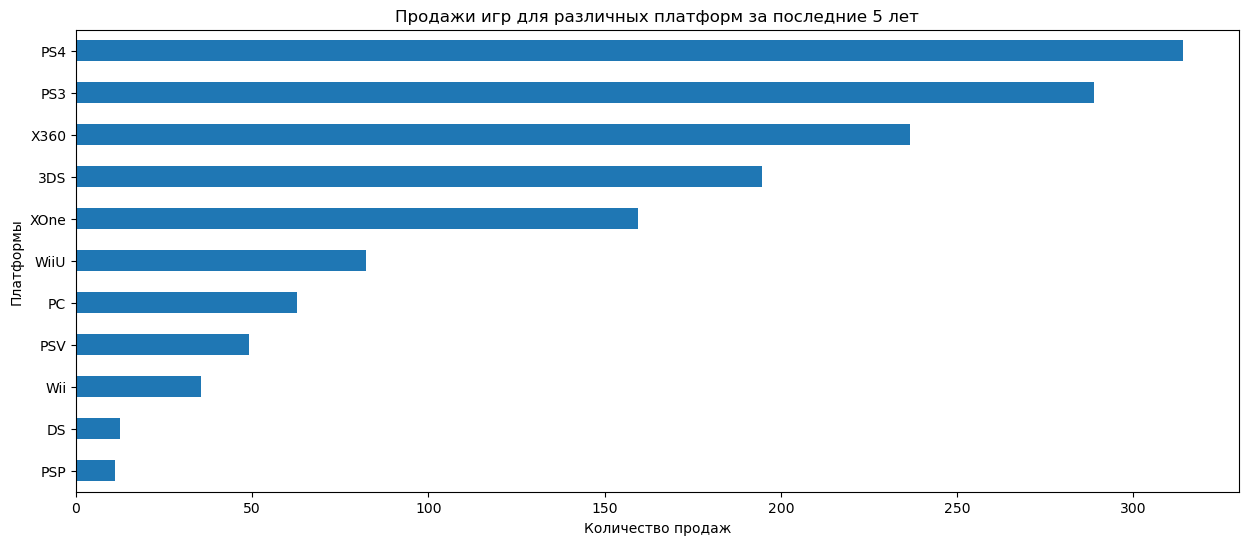

In [39]:
actual_games.groupby('platform')['total_sales'].sum().sort_values().plot(kind='barh', figsize=(15, 6));
plt.title('Продажи игр для различных платформ за последние 5 лет')
plt.ylabel('Платформы')
plt.xlabel('Количество продаж')
plt.show()

Лидеры продаж за послдение 5 лет - PS4, PS3, X360, 3DS, XOne

Однако нас интересует будущие лидеры. Посмотрим, какие платформы сейчас на подъеме, а какие уже переживают "закат". Учываем, что за 2016 год еще нет полных данных. 

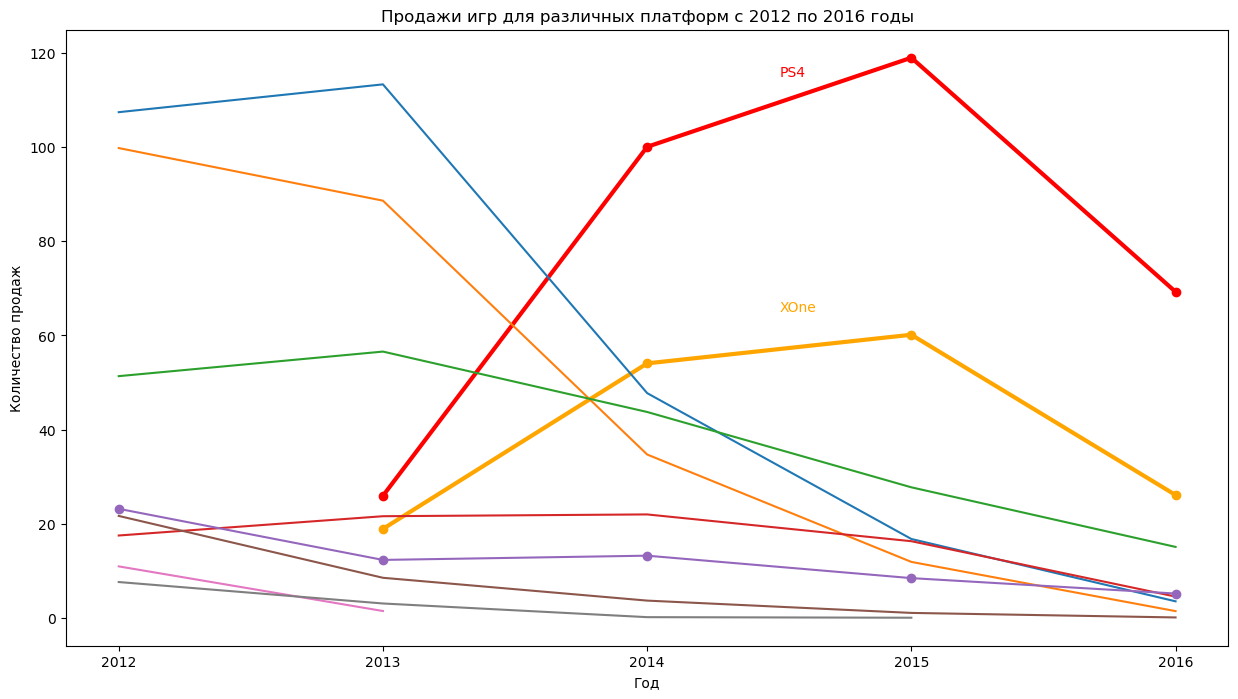

In [40]:
actual_games.query('platform == "PS4"').groupby('year_of_release')['total_sales'].sum().plot(kind='line', marker='o', linewidth=3, color='red');
actual_games.query('platform == "XOne"').groupby('year_of_release')['total_sales'].sum().plot(kind='line', marker='o', linewidth=3, color='orange');
plt.text(2014.5, 115,'PS4', color='red')
plt.text(2014.5, 65,'XOne', color='orange')

actual_games.query('platform == "PS3"').groupby('year_of_release')['total_sales'].sum().plot(kind='line',\
        figsize=(15,8), xticks = actual_games['year_of_release'].unique());
actual_games.query('platform == "X360"').groupby('year_of_release')['total_sales'].sum().plot(kind='line');
actual_games.query('platform == "3DS"').groupby('year_of_release')['total_sales'].sum().plot(kind='line');
actual_games.query('platform == "WiiU"').groupby('year_of_release')['total_sales'].sum().plot(kind='line');
actual_games.query('platform == "PC"').groupby('year_of_release')['total_sales'].sum().plot(kind='line', marker='o');
actual_games.query('platform == "Wii"').groupby('year_of_release')['total_sales'].sum().plot(kind='line');
actual_games.query('platform == "DS"').groupby('year_of_release')['total_sales'].sum().plot(kind='line');
actual_games.query('platform == "PSP"').groupby('year_of_release')['total_sales'].sum().plot(kind='line');

plt.title('Продажи игр для различных платформ c 2012 по 2016 годы')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.show()

Из графика видно, что растут продажи игр для платформ PS4 и XOne. Другие платформы переживают свой закат, их продажи падают, либо уже очень низкие

### Глобальные продажи игр по платформам

Построим диаграммы размаха продаж игр с разбивкой по актуальным платформам

In [41]:
act_pl = actual_games.groupby('platform')['total_sales'].median().sort_values(ascending=False).index
act_pl_sales = []
for pl in act_pl:
    act_pl_sales.append(actual_games[actual_games['platform'] == pl]['total_sales'])

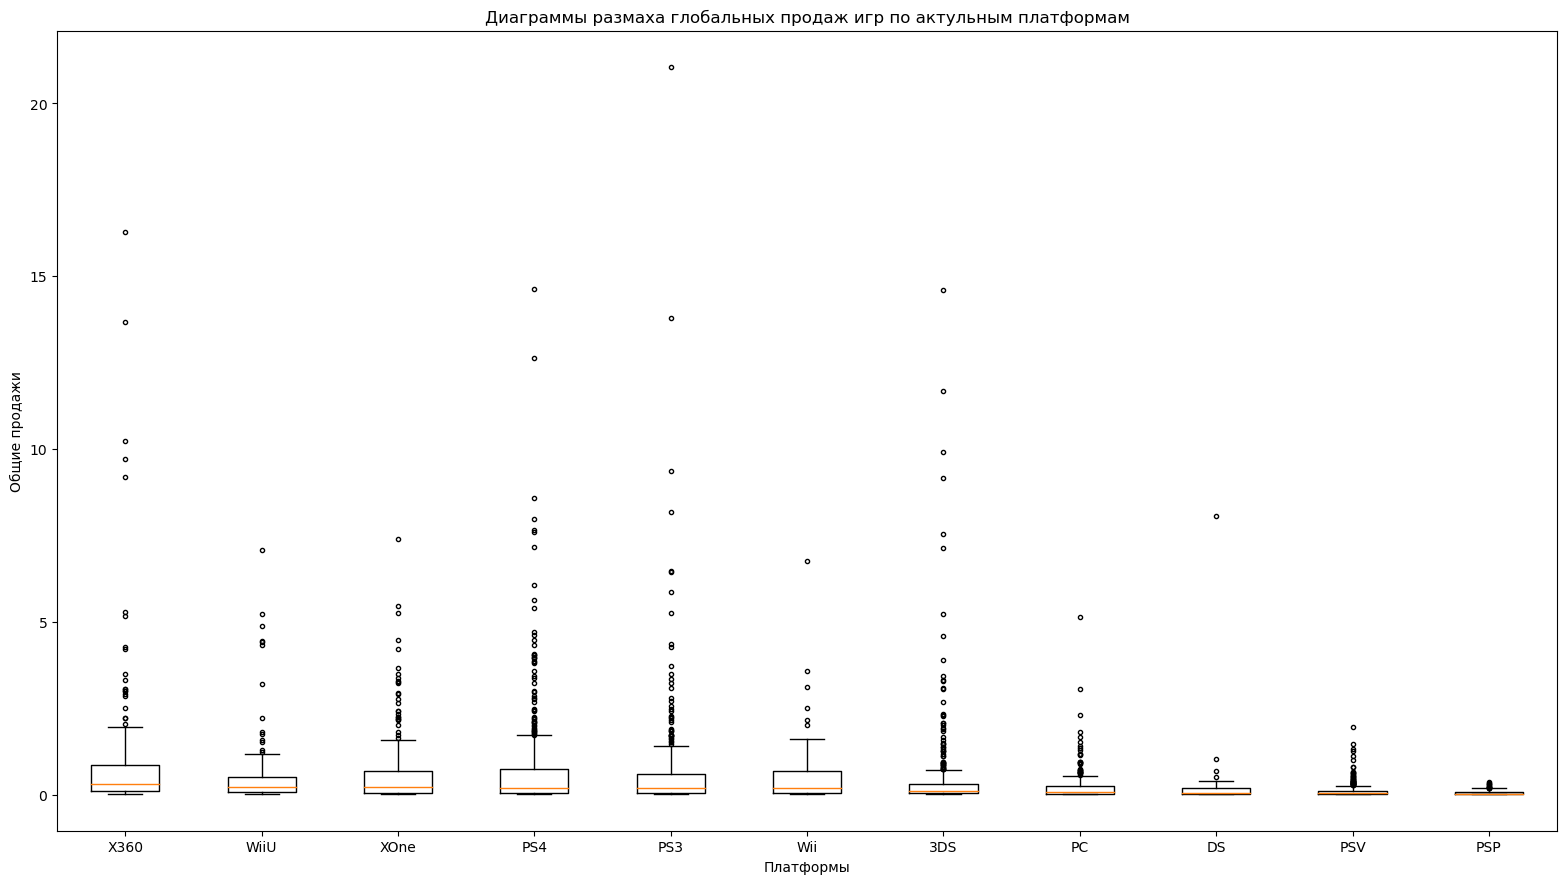

In [42]:
   
fig = plt.figure(figsize = (15, 8)) 
labels = act_pl
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(act_pl_sales, labels = labels, sym = '.') 
plt.title('Диаграммы размаха глобальных продаж игр по актульным платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')

plt.show() 

Из диаграммы размаха видно, что практически для всех платформ есть единичные игры-хиты, которые имеют продажи на порядок выше среднего по платформе. Самые-самые бестселлеоры выходили на платформах PS3, PS4, X360 и 3DS.  

Покажем диаграммы размаха с фокусом на основные значения, без игр-хитов, которые делают выброс из распледения

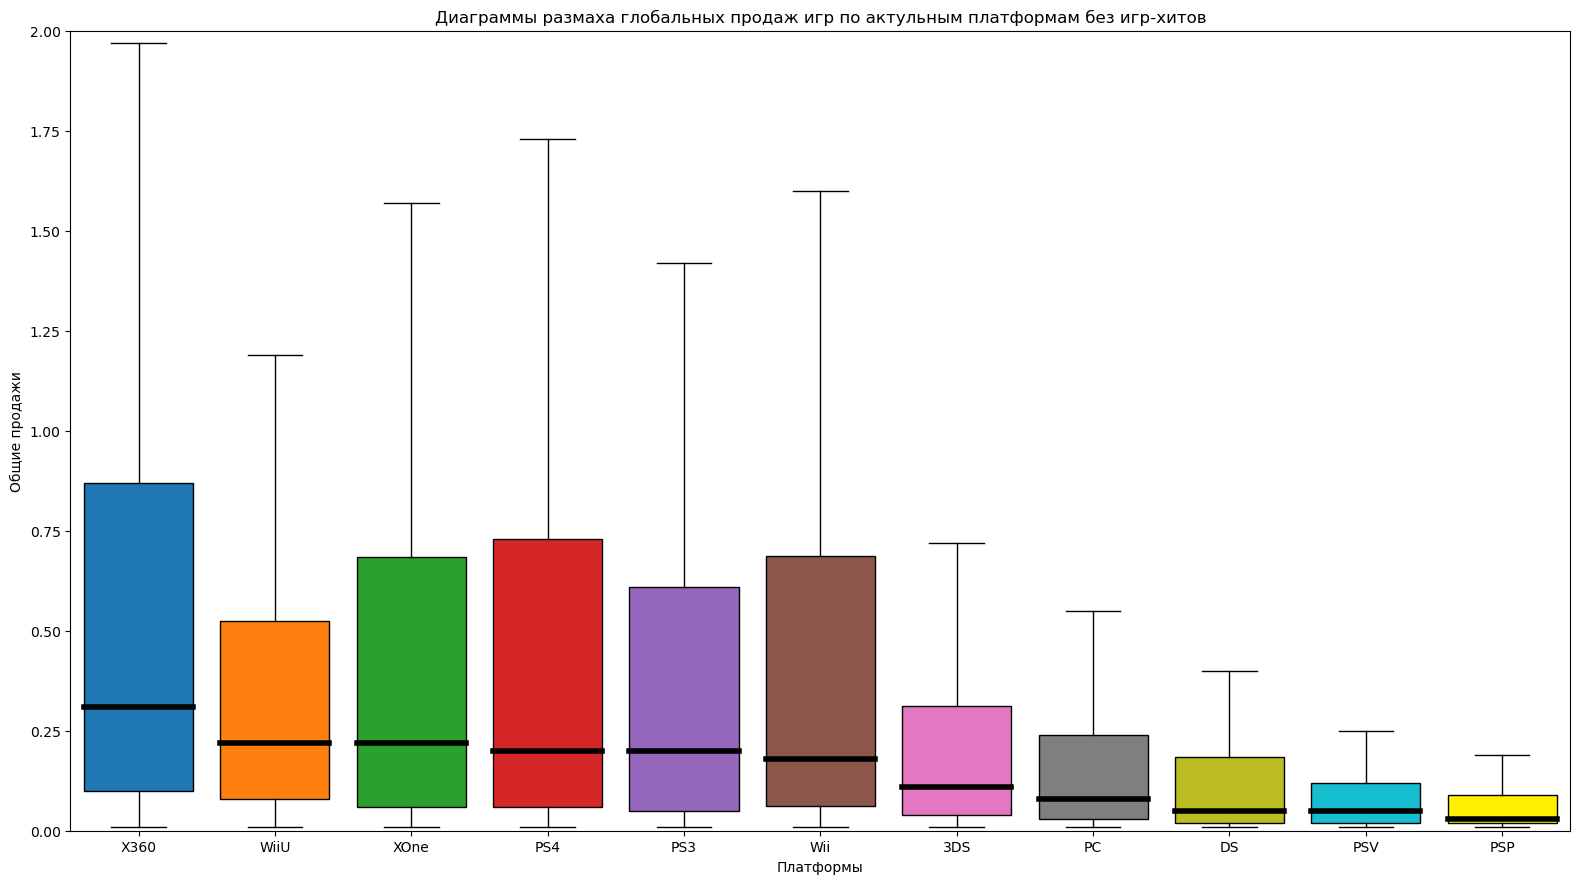

In [43]:
i = 0
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#fff000']

fig = plt.figure(figsize = (15, 8)) 
ax = fig.add_axes([0, 0, 1, 1])
    
for pl in act_pl:
    ax.boxplot(act_pl_sales[i], positions=[i], labels = [pl], widths = 0.8 , sym = '',\
               patch_artist=True, boxprops=dict(facecolor=c[i]), medianprops=dict(color='black', linewidth=4))
    i +=1

ax.set_ylim(0, 2)
plt.title('Диаграммы размаха глобальных продаж игр по актульным платформам без игр-хитов')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')

plt.show() 

Из диаграмм размаха видно, что лидерами по средним продажам являются платформы X360, WiiU, XOne, PS4, PS3 и Wii. Наибольший межквартильный размах, который включает 50% от распрелелния, имеют платформы X360, PS4, XOne, Wii, PS3 и WiiU.

### Влияние рейтингов на продажи

Рассчитаем корреляцию отзывов критикив и игроков в целом по всем платформам

In [44]:
actual_games[['total_sales', 'critic_score', 'user_score']].corr()['total_sales']

total_sales     1.000000
critic_score    0.308633
user_score      0.004194
Name: total_sales, dtype: float64

Коэффициент корреляции много меньше 1, что показыват слабую корреляцию

Построим диаграмму рассеяния продаж от оценок критиков и игроков. Оценки критиков варьируются от 0 до 100, а игроков до 10

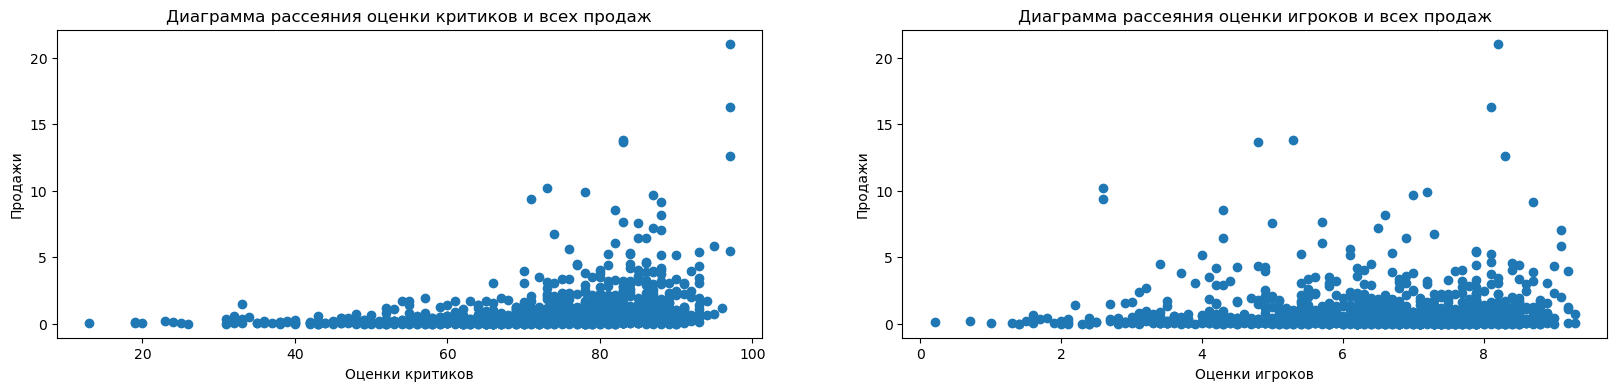

In [45]:
    fig, axs = plt.subplots(nrows= 1, ncols= 2, figsize=(20, 4))
    axs[0].scatter(x=actual_games['critic_score'], y=actual_games['total_sales'])
    axs[0].set_title('Диаграмма рассеяния оценки критиков и всех продаж')
    axs[0].set_ylabel('Продажи')
    axs[0].set_xlabel('Оценки критиков')
    axs[1].scatter(x=actual_games['user_score'], y=actual_games['total_sales'])
    axs[1].set_title('Диаграмма рассеяния оценки игроков и всех продаж')
    axs[1].set_ylabel('Продажи')
    axs[1].set_xlabel('Оценки игроков')

    plt.show()

Из диаграммы рассеяния четких зависимостей продаж от оценок игроков и критиков также не видно.

Проведем такой же анализ корреляции по отдельности для пяти актуальных платфом

Для платформы X360 коэффициент корреляции продаж и отзывов критиков равен 0.36 , а отзывов игроков 0.01


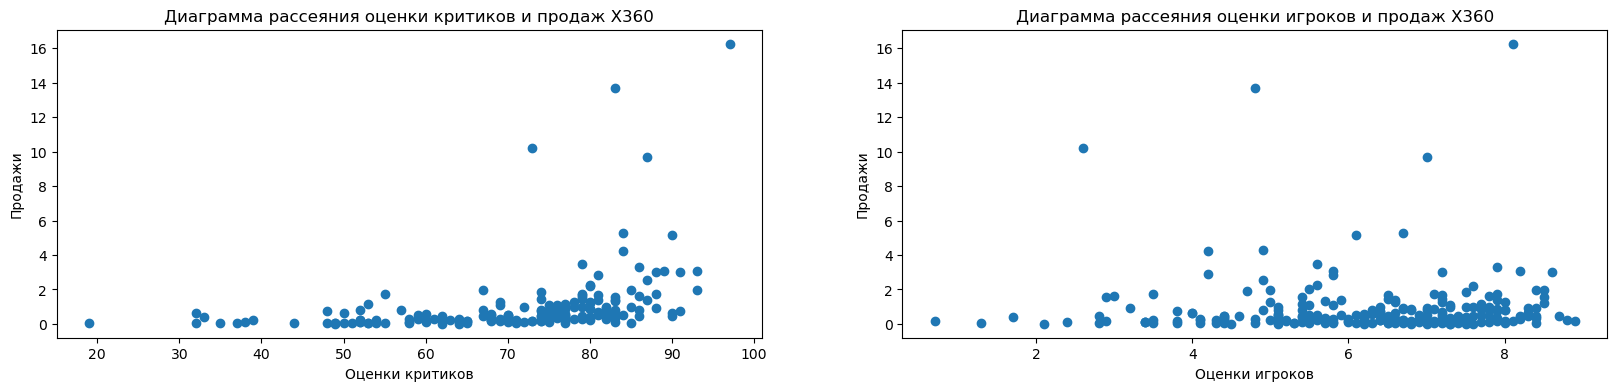

Для платформы XOne коэффициент корреляции продаж и отзывов критиков равен 0.42 , а отзывов игроков -0.07


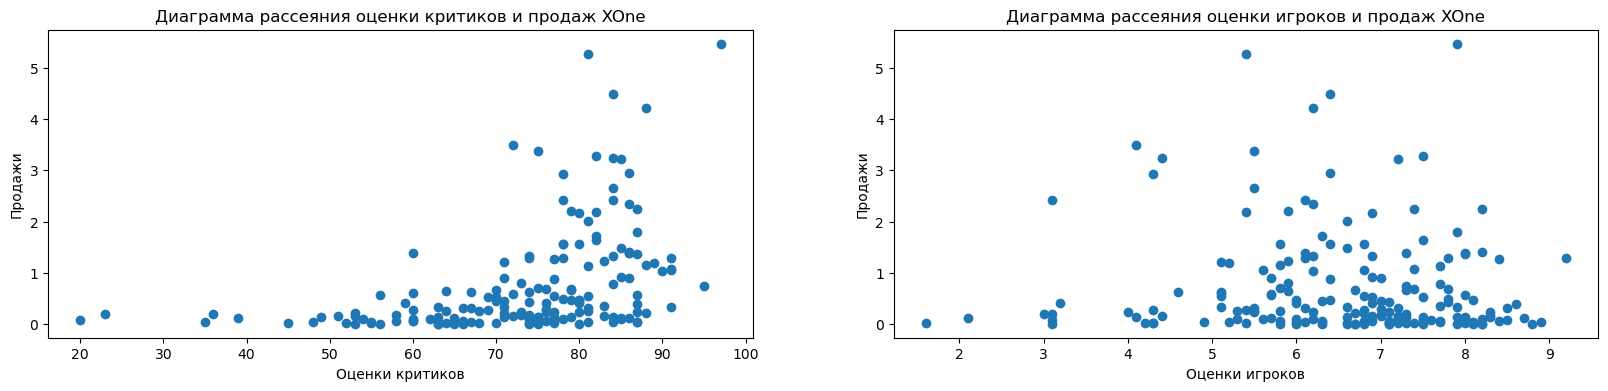

Для платформы PS4 коэффициент корреляции продаж и отзывов критиков равен 0.41 , а отзывов игроков -0.03


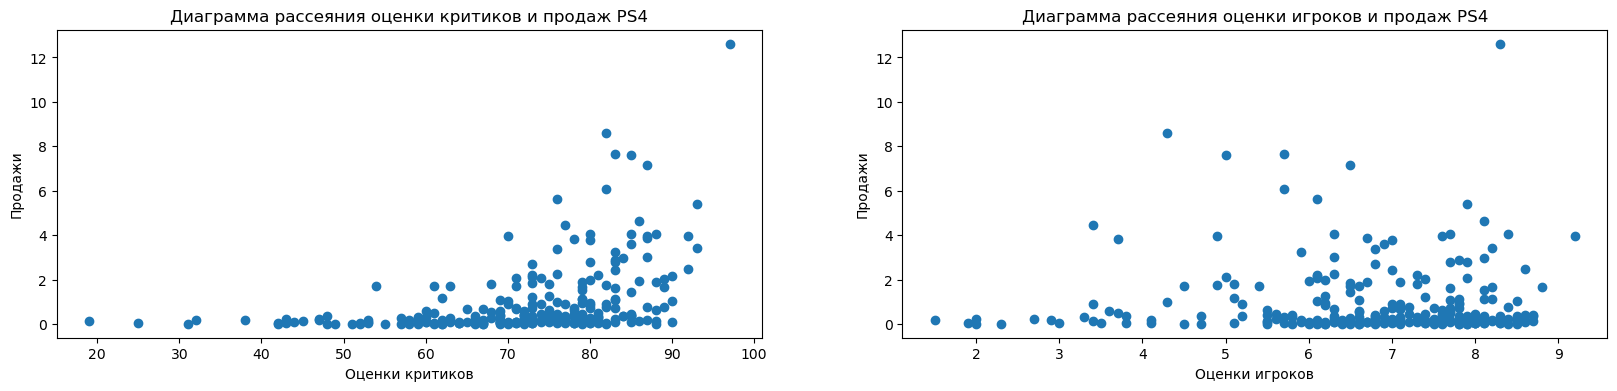

Для платформы PS3 коэффициент корреляции продаж и отзывов критиков равен 0.33 , а отзывов игроков -0.01


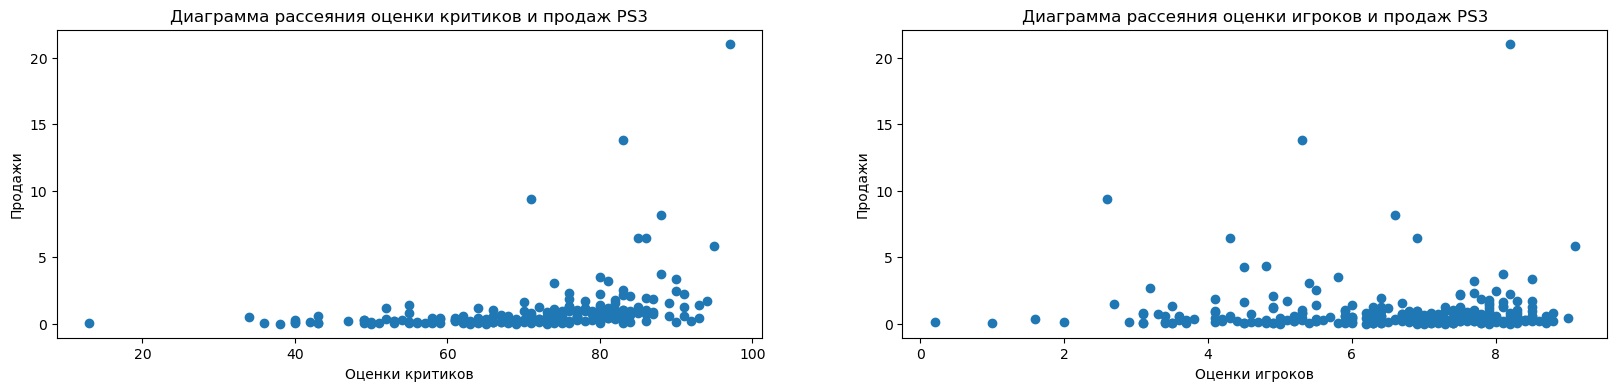

Для платформы WiiU коэффициент корреляции продаж и отзывов критиков равен 0.35 , а отзывов игроков 0.4


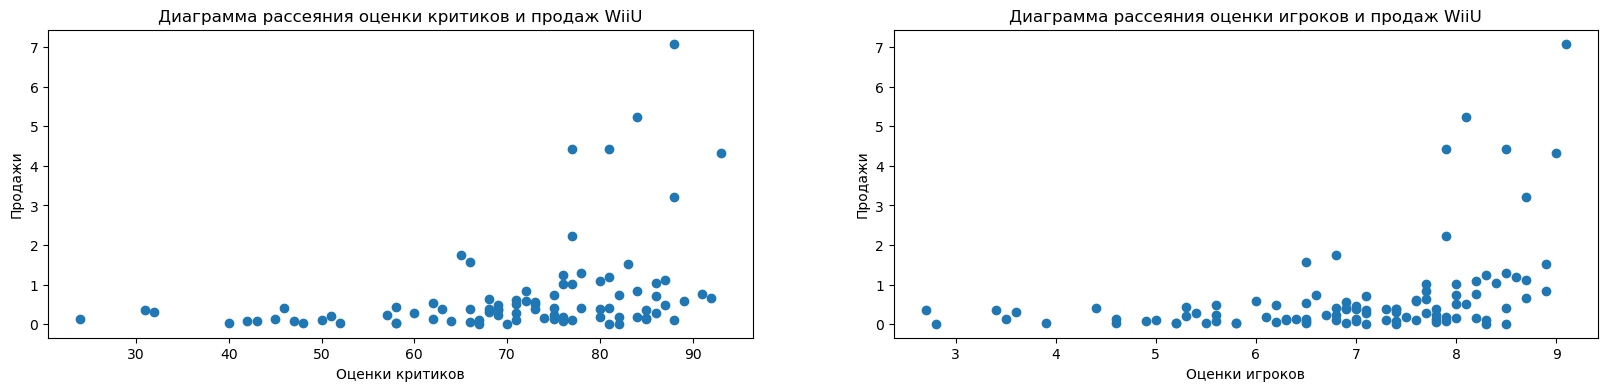

In [46]:
score_pl = ['X360', 'XOne', 'PS4', 'PS3', 'WiiU']


for pl in score_pl:
    tmp = actual_games[actual_games['platform'] == pl]
    score_cor = tmp[['total_sales', 'critic_score', 'user_score']].corr()['total_sales']
    print('Для платформы\033[1m', pl, '\033[0mкоэффициент корреляции продаж и отзывов критиков равен',  round(score_cor['critic_score'], 2),\
          ', а отзывов игроков', round(score_cor['user_score'], 2))

    fig, axs = plt.subplots(nrows= 1, ncols= 2, figsize=(20, 4))
    axs[0].scatter(x=tmp['critic_score'], y=tmp['total_sales'])
    axs[0].set_title('Диаграмма рассеяния оценки критиков и продаж ' + pl)
    axs[0].set_ylabel('Продажи')
    axs[0].set_xlabel('Оценки критиков')
    axs[1].scatter(x=tmp['user_score'], y=tmp['total_sales'])
    axs[1].set_title('Диаграмма рассеяния оценки игроков и продаж ' + pl)
    axs[1].set_ylabel('Продажи')
    axs[1].set_xlabel('Оценки игроков')

    plt.show()

В разрезе платформ коэффициент корреляции также много меньше 1, что показыват слабую зависимость продаж от оценок критиков или игроков. Из диаграммы рассеяния четких зависимостей продаж от оценок критиков или игроков также не видно. Как итог: можно утверждать, что продажи от отзывов как критиков, так и игроков - не зависят

### Самые прибыльные жанры

Оценим жанры игр, которые показыват самые большие продажи

Суммарыне продажи по жарнам распределются так

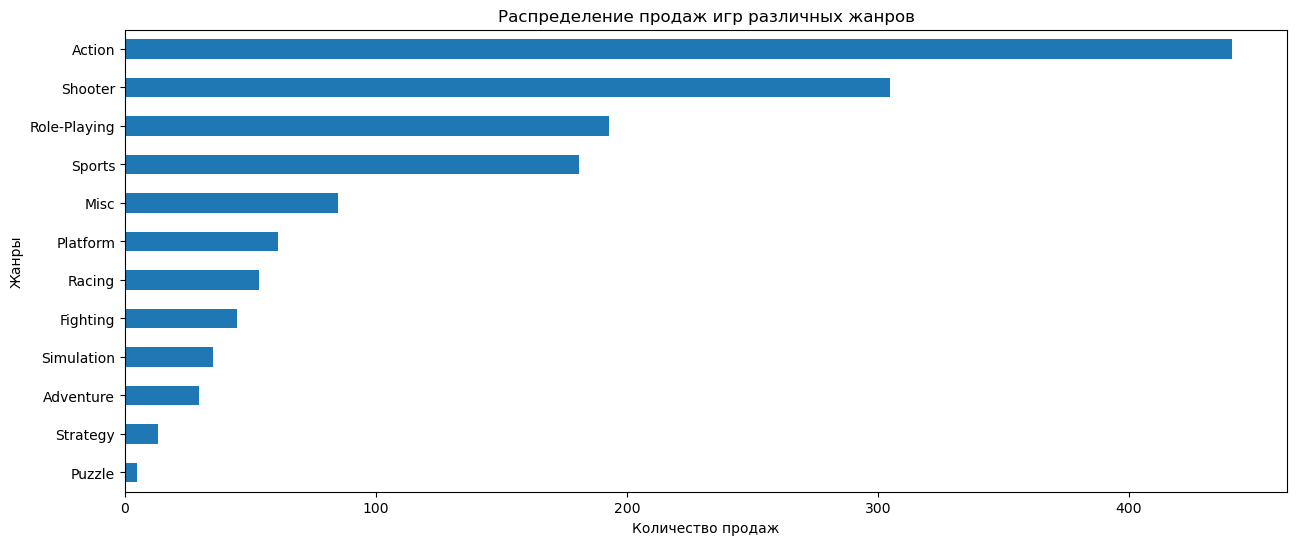

In [47]:
actual_games.groupby('genre')['total_sales'].sum().sort_values().plot(kind='barh', figsize=(15, 6));
plt.title('Распределение продаж игр различных жанров')
plt.ylabel('Жанры')
plt.xlabel('Количество продаж')
plt.show()

Экшен, шутеры, ролевые и спортивные игры - в сумме имеют самыее больше продажи.

Однако диаграммы размаха дают несколько другую картину

In [48]:
genre = actual_games.groupby('genre')['total_sales'].median().sort_values(ascending=False).index
genre_sales = []
for ge in genre:
    genre_sales.append(actual_games[actual_games['genre'] == ge]['total_sales'])

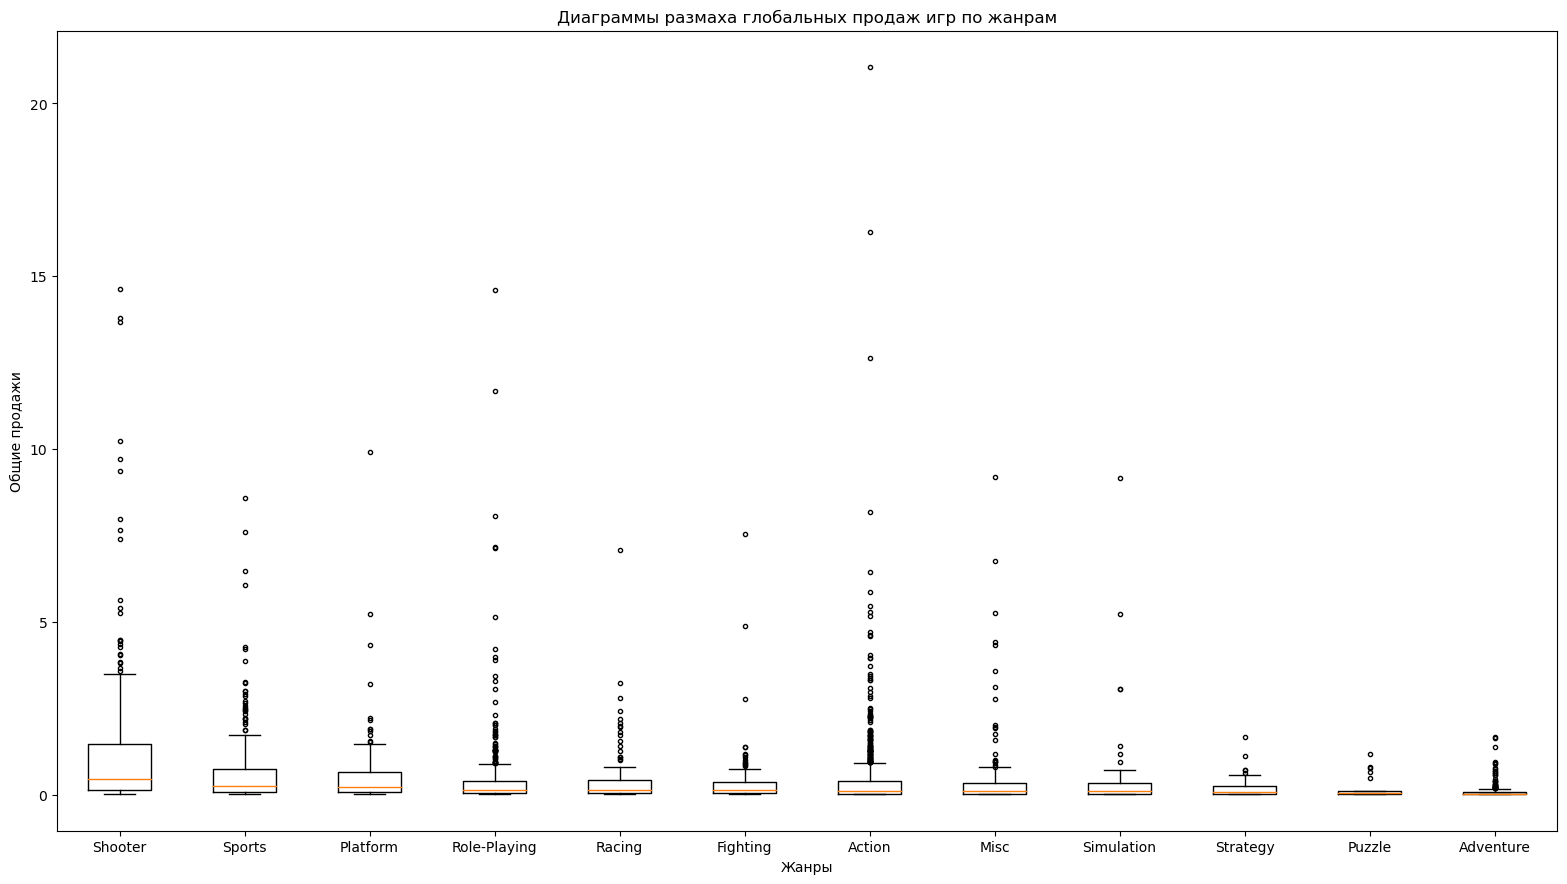

In [49]:
fig = plt.figure(figsize = (15, 8)) 

ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(genre_sales, labels = genre, sym = '.') 
plt.title('Диаграммы размаха глобальных продаж игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')

plt.show() 

Из полной диаграммы размаха видно, что экшены имеют большие продажи благодаря отдельным играм-хитам. Если проранжировать по средним продажам по жанрам, то экшен не входит даже в пятерку лучших.

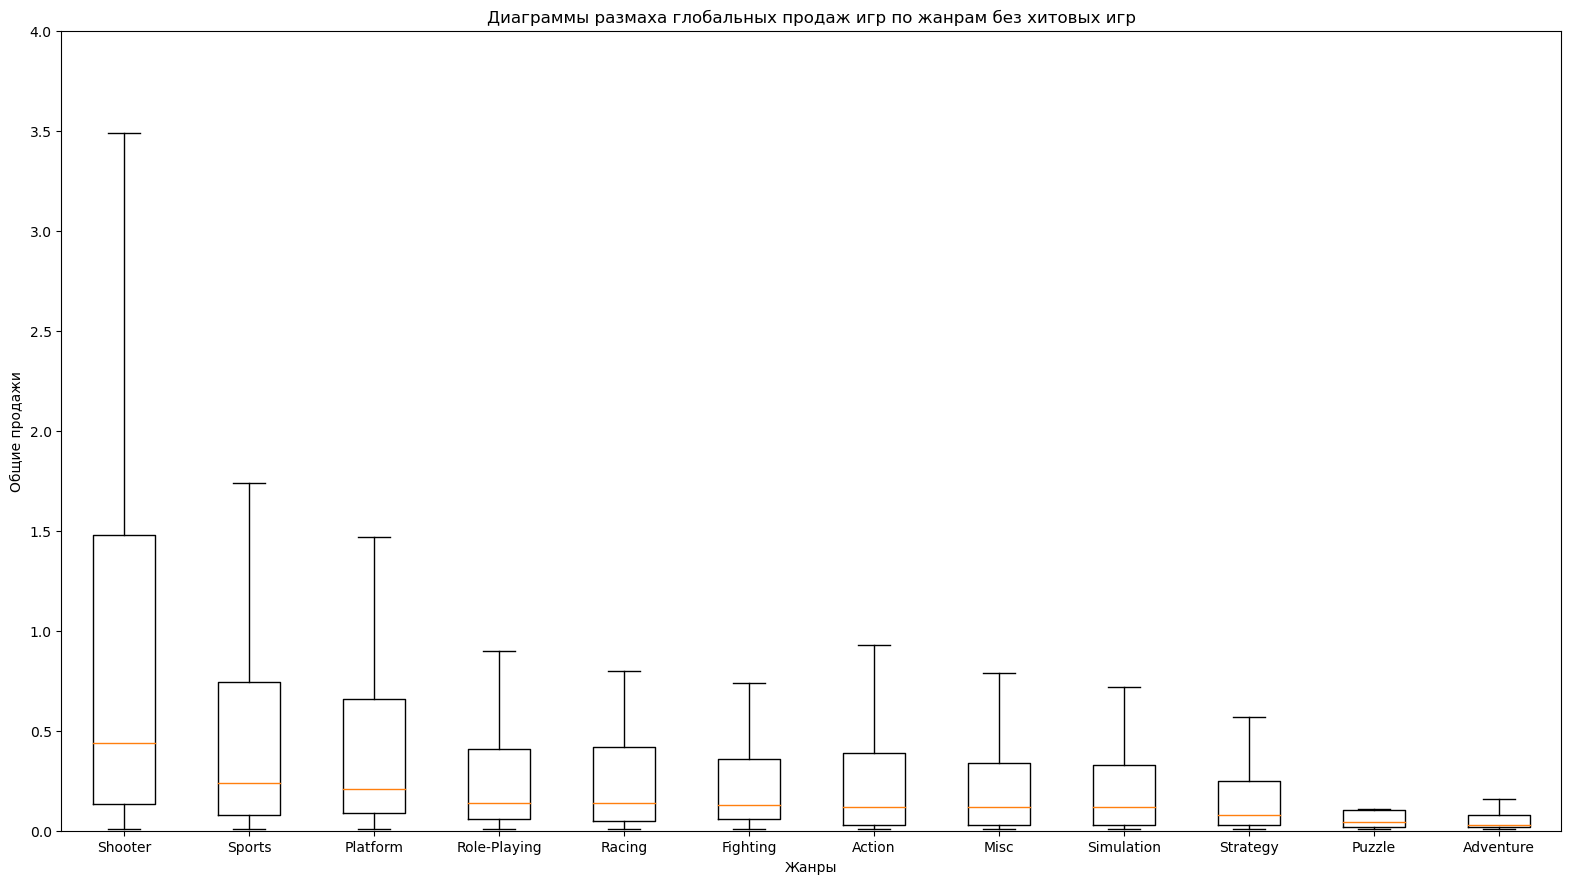

In [50]:
fig = plt.figure(figsize = (15, 8)) 

ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(genre_sales, labels = genre, sym = '') 
ax.set_ylim(0, 4)

plt.title('Диаграммы размаха глобальных продаж игр по жанрам без хитовых игр')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')

plt.show() 

Шутеры, спортиные игры, платформеры, ролевые игры и гонки - вот наиболее востребованные жанры по средним продажам. Оттадаться игровым рефлексам - вот что предпочитают игроманы. А игры жанров головоломки и приключения, где надо логически думать - покупают меньше всего.

### Промежуточный итог


Проанализировав предстваленный датасет с играми пришли к следующим выводам:
- Цикл жизни игровой платформы около 10 лет
- На конец 2016 года на подъеме PS4 и XOne
- Продажи игр не зависят от оценки игроков и критиков
- Самые продающиеся в среднем жанры игр - шутеры, спортиные игры, платформеры, ролевые игры и гонки

## Портрет пользователей

Составим прортрет игроков в зависимости от региона, для которых есть данные о продажах игр - Северная Америка, Европа и Япония

### ТОП-5 платфом по регионам

Оценим ТОП-5 наиболее популярных у игроков платфом в посдение 5 лет по регионам

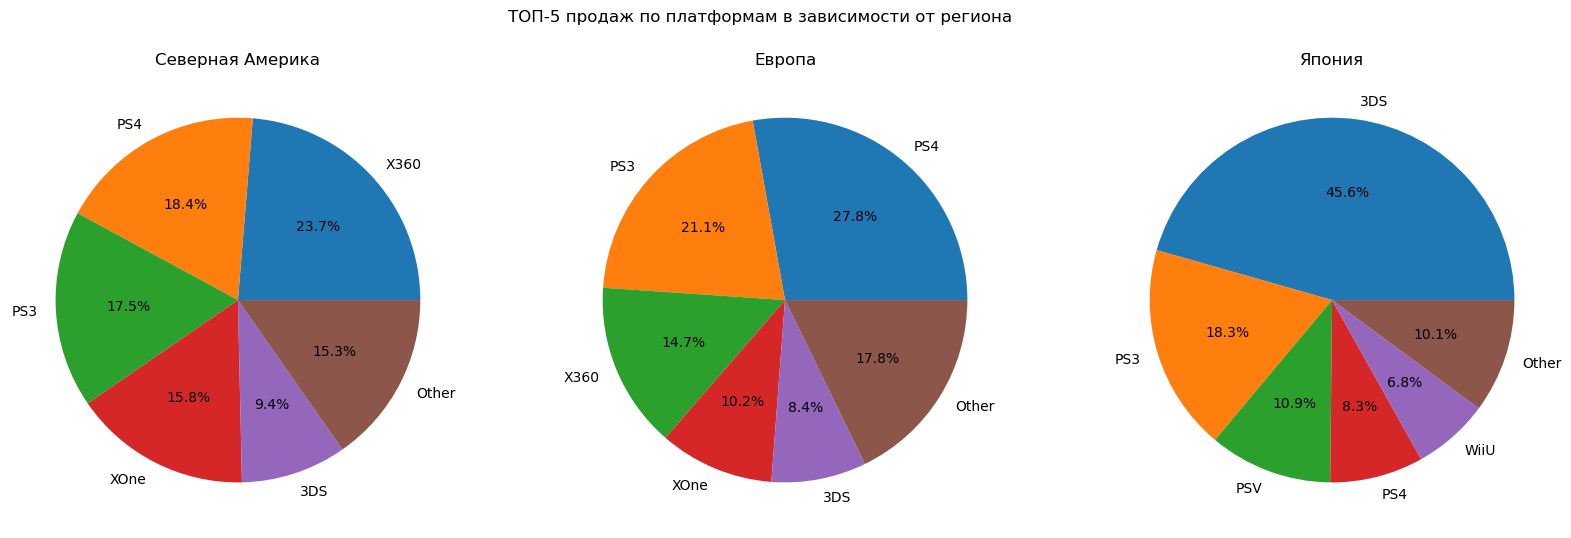

In [51]:
na_sales = actual_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
na_sales['Other'] = actual_games['na_sales'].sum() - na_sales.sum()
eu_sales = actual_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_sales['Other'] = actual_games['eu_sales'].sum() - eu_sales.sum()
jp_sales = actual_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_sales['Other'] = actual_games['jp_sales'].sum() - jp_sales.sum()

fig, axs = plt.subplots(nrows= 1, ncols= 3, figsize=(20, 6))

axs[0].pie(na_sales, labels = na_sales.index, autopct='%1.1f%%');
axs[0].set_title('Северная Америка')
axs[1].pie(eu_sales, labels = eu_sales.index, autopct='%1.1f%%');
axs[1].set_title('Европа')
axs[2].pie(jp_sales, labels = jp_sales.index, autopct='%1.1f%%');
axs[2].set_title('Япония')
plt.suptitle('ТОП-5 продаж по платформам в зависимости от региона')
plt.show()

Из круговых диаграмм видно, но в целом Америка и Европа похожи - лидеры среди платформ PS4, PS3, X360, XOne и 3DS. Причем первая тройка - PS4, PS3, X360 занимают сопоставимые доли рынка. 

А в Японии распространены другие платформы: 3DS, PS3, PSV, WiiU и PSP. Причем почти половина продаж приходиться на 3DS

### ТОП-5 жанров по регионам

Оценим ТОП-5 наиболее популярных жанров в посдение 5 лет по регионам

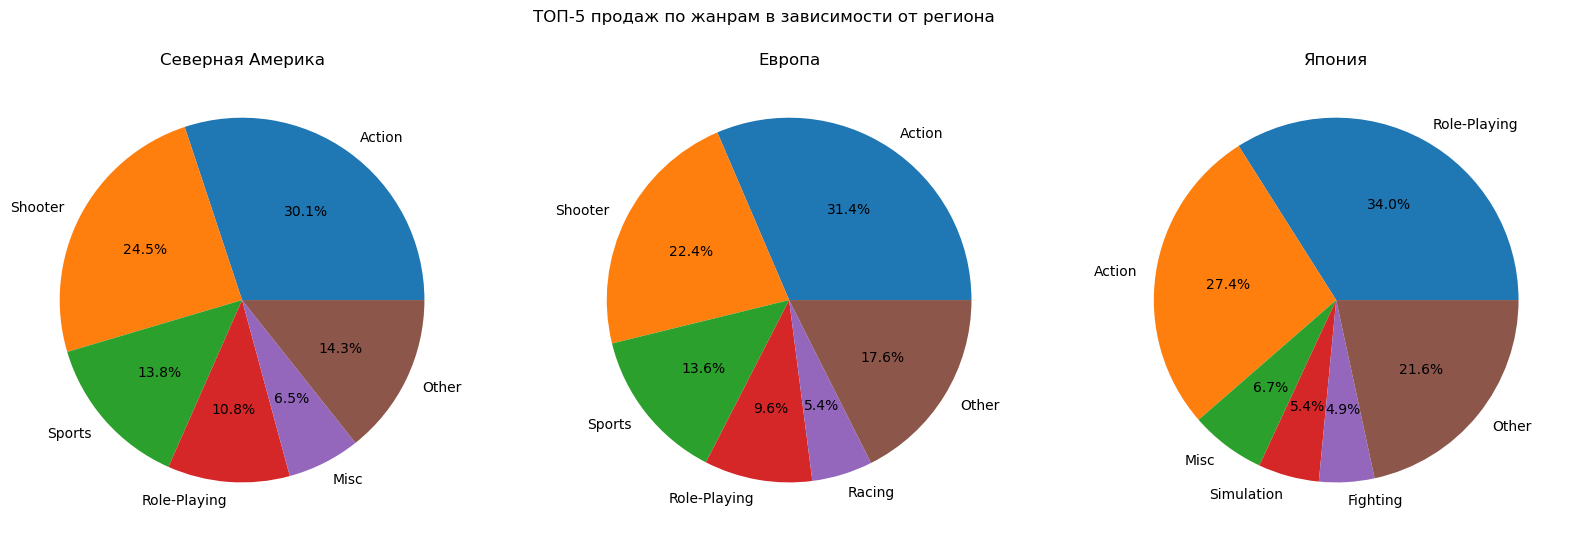

In [52]:
na_sales = actual_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
na_sales['Other'] = actual_games['na_sales'].sum() - na_sales.sum()
eu_sales = actual_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
eu_sales['Other'] = actual_games['eu_sales'].sum() - eu_sales.sum()
jp_sales = actual_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_sales['Other'] = actual_games['jp_sales'].sum() - jp_sales.sum()

fig, axs = plt.subplots(nrows= 1, ncols= 3, figsize=(20, 6))

axs[0].pie(na_sales, labels = na_sales.index, autopct='%1.1f%%');
axs[0].set_title('Северная Америка')
axs[1].pie(eu_sales, labels = eu_sales.index, autopct='%1.1f%%');
axs[1].set_title('Европа')
axs[2].pie(jp_sales, labels = jp_sales.index, autopct='%1.1f%%');
axs[2].set_title('Япония')

plt.suptitle('ТОП-5 продаж по жанрам в зависимости от региона')
plt.show()

Из круговых диаграмм видно, но по жарновым предпочтениями в целом Америка и Европа еще больше похожи. Лидеры среди жанров Экшен, шутеры и спортивные игры. Эти жанры занимают 2/3 рынка. 

В Японии другая картина: распространены ролевые игры и экшен - только на эти два жанра приходится 2/3 рынка.

### Возрастной рейтинг игр ESRB

Возрастной рейтинг игр ESRB основан на их содержании аналогично рейтинговым системам кино.

- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). 
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
- «RP» («Rating Pending») — «Рейтинг ожидается»:

Напомним, заглушка "not_def" означает, что у игры в изначальном датасете не указано рейтинга ESRB. Возможно, это связано с тем, что игра официально не продавалась в Северной Америке. Однако, как видно из данных, продажи все-таки в этом регионе были.

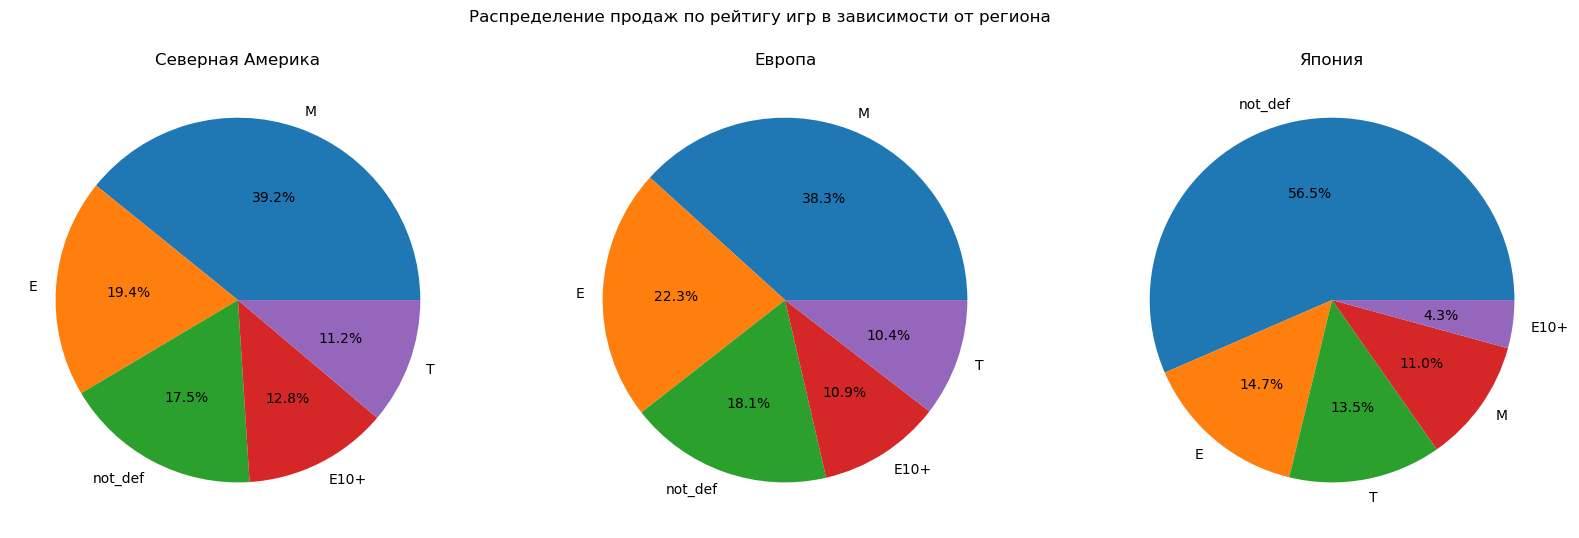

In [53]:
na_sales = actual_games.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_sales = actual_games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_sales = actual_games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)


fig, axs = plt.subplots(nrows= 1, ncols= 3, figsize=(20, 6))

axs[0].pie(na_sales, labels = na_sales.index, autopct='%1.1f%%');
axs[0].set_title('Северная Америка')
axs[1].pie(eu_sales, labels = eu_sales.index, autopct='%1.1f%%');
axs[1].set_title('Европа')
axs[2].pie(jp_sales, labels = jp_sales.index, autopct='%1.1f%%');
axs[2].set_title('Япония')

plt.suptitle('Распределение продаж по рейтигу игр в зависимости от региона')
plt.show()

В Европе и Северной Америке больше продаются игры для лиц старше 17 лет, а также игры без возрастного ограничения. При этом игры без рейтинга ESRB имеют существенную долю в Северной Америке, где, по идее, оне не должны продаваться. В Японии с большим отрывом в лидерах продаж игры без рейтинга ESRB.

### Промежуточный итог 
Анализ датасета дате разные портреты игроков в регионах:
- В Северной Америке и Европе играют на PS4, PS3 или X360 в экшен игры или шутеры с рейтингом "+17" и "для всех"
- В Япомнии больше играют на 3DS и PS3 в ролевые и экшен игры без рейтинга ESRB

## Проверка гипотиз

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Надо сравнить две независимые выборки - используем ttest_ind. Нулевая гипотеза - рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза - рейтинги платформ Xbox One и PC НЕ одинаковые, то есть разные. Зададим значение alpha = 5%

Формируем выборки для сравнения из исходного датасета

In [54]:
pc = actual_games.query('platform == "PC" & ~user_score.isna()')

In [55]:
xone = actual_games.query('platform == "XOne" & ~user_score.isna()')

In [56]:
st.ttest_ind(pc['user_score'], xone['user_score'], equal_var=False)

TtestResult(statistic=-0.5998585993590415, pvalue=0.5489537965134912, df=384.51694253185775)

pvalue=0.55, что значительно больше заданного alpha в 5%. Значит нулевая гипотеза, что рейтинги игроков платформ Xbox One и PC одинаковые, не может быть отвергнута.

Для проверки построим гистограмму распределения оценок игроков платформ Xbox One и PC

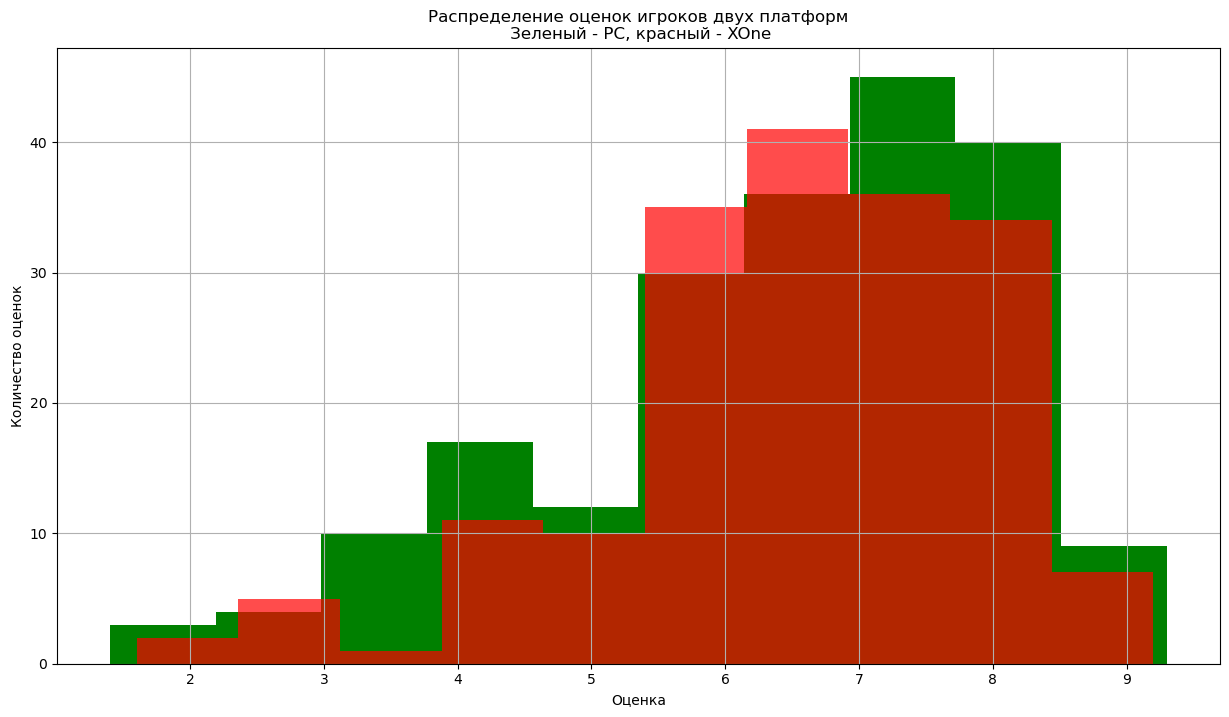

In [57]:
pc['user_score'].hist(bins=10, color='green', figsize=(15,8));
xone['user_score'].hist(bins=10, color='red', alpha=0.7);
plt.title('Распределение оценок игроков двух платформ\n Зеленый - PC, красный - XOne')
plt.ylabel('Количество оценок')
plt.xlabel('Оценка')
plt.show()

Распределения действительно очень похожи

Похоже, что рейтинги платформ Xbox One и PC действительно разные

### Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные

Надо сравнить две независимые выборки - используем ttest_ind. Нулевая гипотеза - рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза - рейтинги жанров Action и Sports НЕ одинаковые, то есть разные. Зададим значение alpha = 5%

Формируем выборки для сравнения из исходного датасета

In [58]:
action = actual_games.query('genre == "Action" & ~user_score.isna()')

In [59]:
sport = actual_games.query('genre == "Sports" & ~user_score.isna()')

Т-test выборок оценок пользовательских рейтингов жанров Action и Sports одинаковые.

In [60]:
st.ttest_ind(action['user_score'], sport['user_score'], equal_var=False)

TtestResult(statistic=9.863487132322389, pvalue=5.989458066467418e-20, df=286.6449459724757)

pvalue много меньше единицы и заданного alpha в 5%. Следовательно нулевая гипотеза, что пользовательские рейтинги жанров Action и Sports одинаковые - отвергается, принимается альтернативная гипотеза - рейтинги жанров Action и Sports НЕ одинаковые, то есть разные.

Для проверки построим гистограмму распределения оценок игроков по жанрам Action и Sports

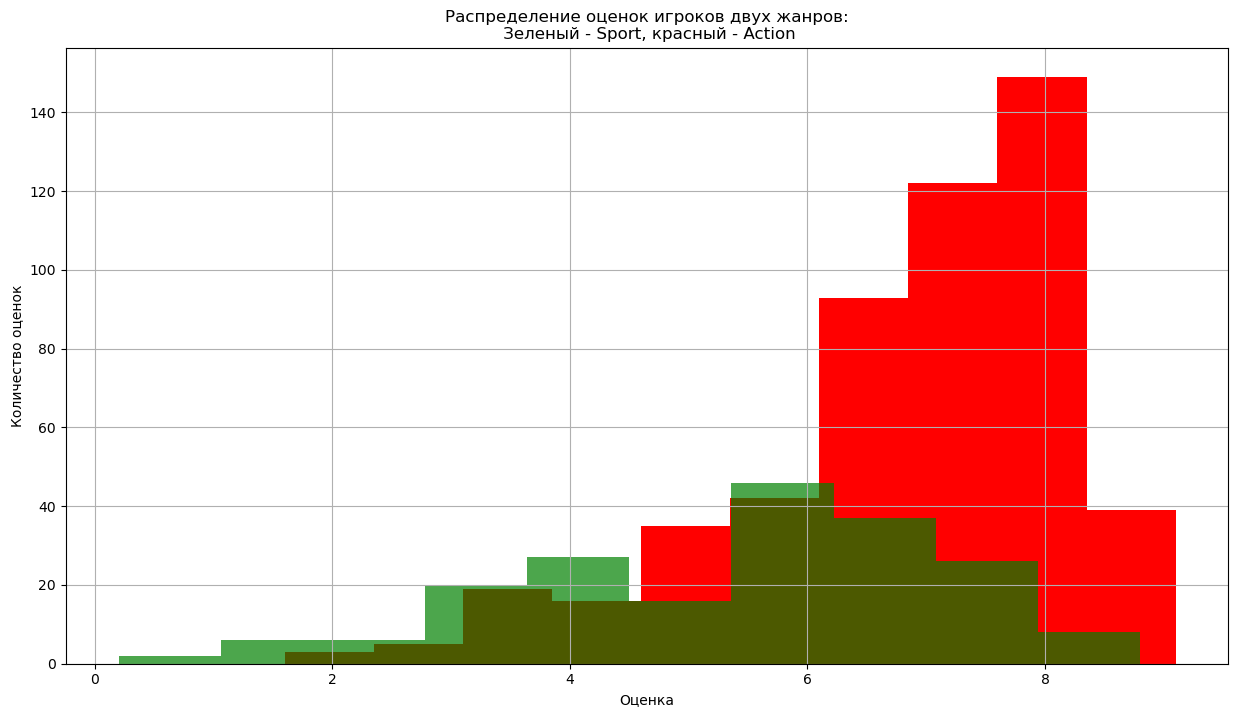

In [61]:
action['user_score'].hist(bins=10, color='red', figsize=(15,8));
sport['user_score'].hist(bins=10, color='green', alpha=0.7);
plt.title('Распределение оценок игроков двух жанров:\n Зеленый - Sport, красный - Action')
plt.ylabel('Количество оценок')
plt.xlabel('Оценка')
plt.show()

Распределения разительно отличаются

### Промежуточный итог

Проверка предложенных гипоез дала:
- гипотеза, что рейтинги платформ Xbox One и PC одинаковые - не была отвергнута
- гипотеза, что рейтинги жанров Action и Sports одинаковые - была отвергнута

## Основной вывод

Провели исследование для интернет-магазина компьютерных игр «Стримчик». Для анализа были предоставлены исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах, которые были собираны из различных открытых источников. В ходе предобработки была проведена небольшая корректировка данных - заполнение пропусков, исправление типов данных. 

В ходе исследования было выявлено, что в целом наибоее перспектиными являются платформы  PS4 и XOne, а наиболее востребованными жанрами - шутеры, спортиные игры, платформеры, ролевые игры и гонки. Также выяснилось, что наибольшее количество продаж дают несколько десятков самых хитовых игр. Сотни "средних" игр дают меньше половины всех продаж. Примечательно, что оценки критиков и игроков не влияют на уровень продажи игр.

В ходе исследования было выявлено, что портреты игроков отличаются в зависимости от региона. Так, в Северной Америке и Европе играют на PS4, PS3 или X360 в экшен игры или шутеры со взрослым рейтингом ESRB (M), а в Япомнии больше играют на 3DS и PS3 в ролевые и экшен игры без рейтинга ESRB. 

При проверке t-тест гипотеза, что рейтинги платформ Xbox One и PC одинаковые получила довольно высокий pvalue (59%) и не была отвергнута, а гипотеза, что рейтинги жанров Action и Sports одинаковые - была отвергнута.